# Setting up the Jupyter Environment and Working with Julia 

## Plotting

The following code will generate the plot of $f(x) = \sin(x)$ and $g(x) = \cos(x)$

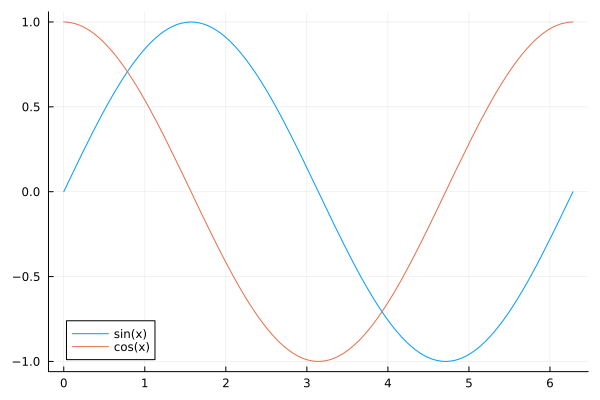

In [3]:
using Plots
plot(sin, 0, 2π, label="sin(x)")
plot!(cos, 0, 2π, label="cos(x)")

## Some stat stuff

### Random Number Generator and Hypothesis Testing

This following code will generate random number from distribution $X \sim \text{Beta}(1,2)$

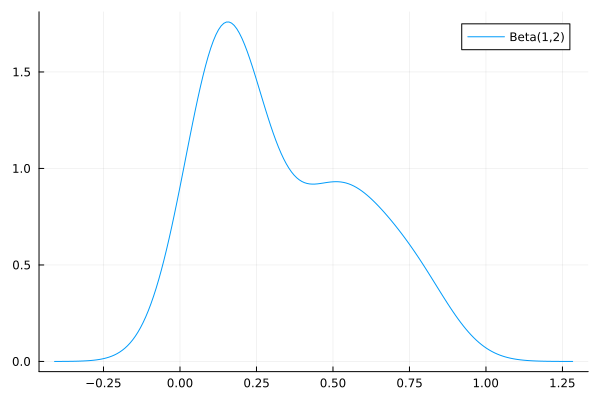

In [17]:
#generate random number from Beta(1,2) distribution
using Distributions
d = Beta(1,2) #should be triangular
#plot scatterplot of 20 random numbers
using StatsPlots
x = rand(d, 20)
density(vec(x), label="Beta(1,2)")

In [18]:
#test whether the sample X~N(0,1) or not
using HypothesisTests
normal = Normal(0,1)
ApproximateOneSampleKSTest(vec(x), normal)


Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.526941

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-04

Details:
    number of observations:   20
    KS-statistic:             2.3565537627860595


In [19]:
#test whether the sample X~Beta(1,2) or not
ApproximateOneSampleKSTest(vec(x), d)

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.144463

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7981

Details:
    number of observations:   20
    KS-statistic:             0.6460578294916653


### Regression stuff

Let say we have a model $Y = \beta X + \varepsilon$ where $X\in\mathbb{R}^2$ and $\varepsilon\sim \text{Beta}(1,2)$

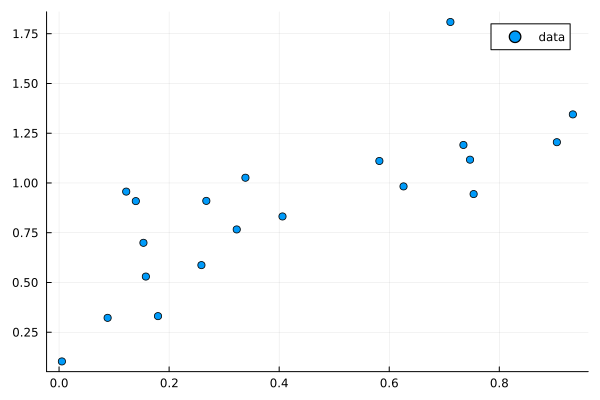

In [20]:
#generate a dataset of y = 1.2x + e where e~Beta(1,2)
x = rand(20)
y = 1.2x + rand(d, 20)
scatter(x, y, label="data")

In [21]:
#fit a linear model
using GLM, DataFrames
ols = lm(@formula(y ~ x), DataFrame(x=x, y=y))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
───────────────────────────────────────────────────────────────────────
                Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  0.454514    0.100269  4.53    0.0003   0.243856   0.665172
x            1.01827     0.195948  5.20    <1e-04   0.606602   1.42995
───────────────────────────────────────────────────────────────────────